In [1]:
#Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Load Dataset
data=pd.read_csv('./swiss.csv')
data.head()

,Fertility,Agriculture,Examination,Education,Catholic,InfantMortality
0,80.2,17.0,15,12,9.96,22.2
1,83.1,45.1,6,9,84.84,22.2
2,92.5,39.7,5,5,93.40,20.2
3,85.8,36.5,12,7,33.77,20.3
4,76.9,43.5,17,15,5.16,20.6


In [3]:
#Dropping regions column - Regions not given or numbered in Dataset
data2=data.drop('Unnamed: 0', axis=1, errors='ignore')

#Show Key Statistics
data2.describe()

,Fertility,Agriculture,Examination,Education,Catholic,InfantMortality
count,47.000000,47.000000,47.000000,47.000000,47.00000,47.000000
mean,70.142553,50.659574,16.489362,10.978723,41.14383,19.942553
std,12.491697,22.711218,7.977883,9.615407,41.70485,2.912697
min,35.000000,1.200000,3.000000,1.000000,2.15000,10.800000
25%,64.700000,35.900000,12.000000,6.000000,5.19500,18.150000
50%,70.400000,54.100000,16.000000,8.000000,15.14000,20.000000
75%,78.450000,67.650000,22.000000,12.000000,93.12500,21.700000
max,92.500000,89.700000,37.000000,53.000000,100.00000,26.600000


<Axes: >

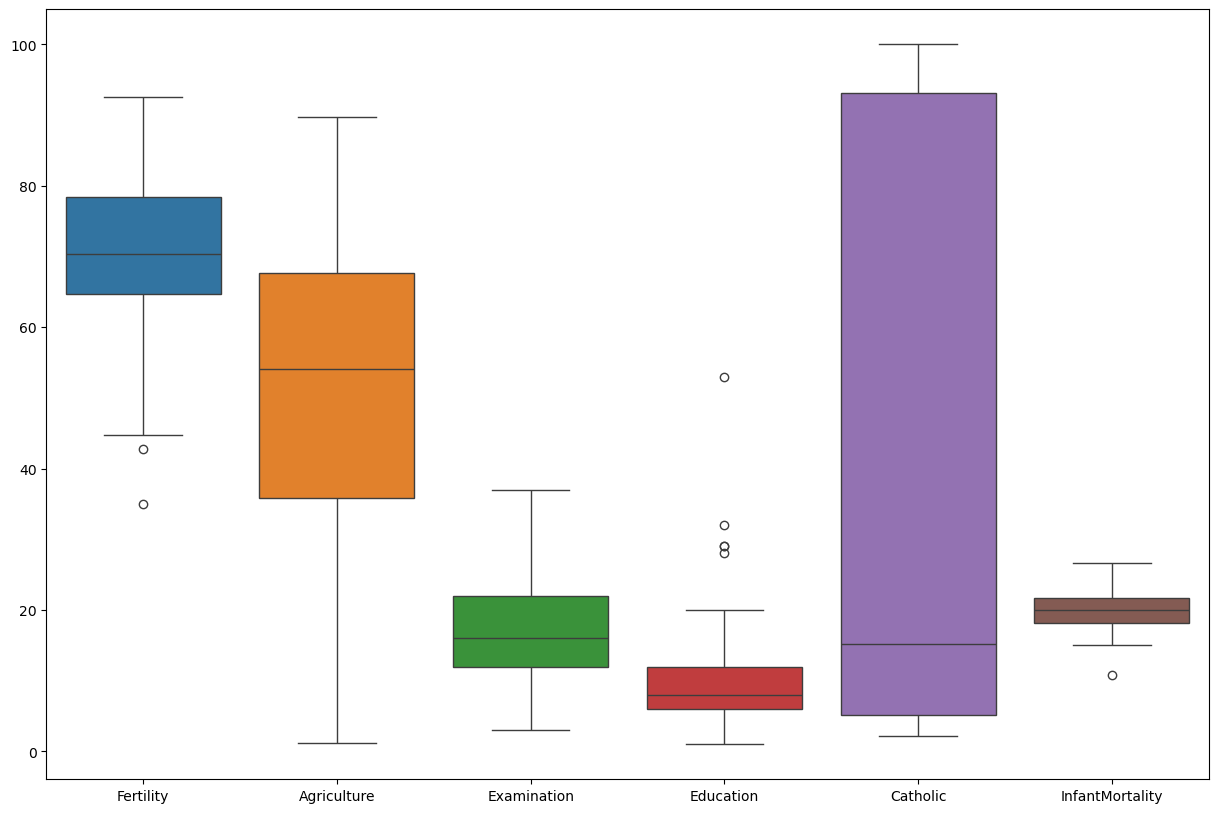

In [4]:
#Boxplot Visualization
plt.figure(figsize=(15,10))
sns.boxplot(data=data2)

Fertility


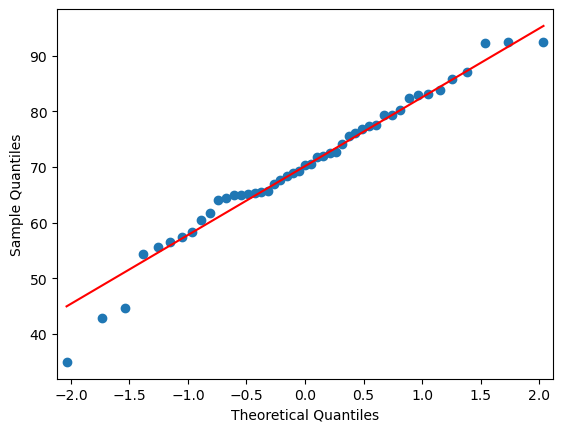

Agriculture


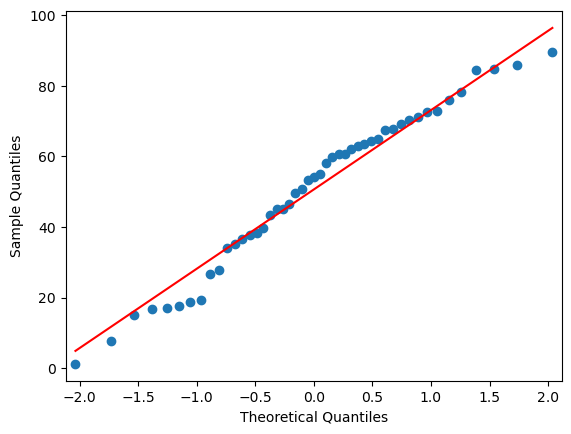

Examination


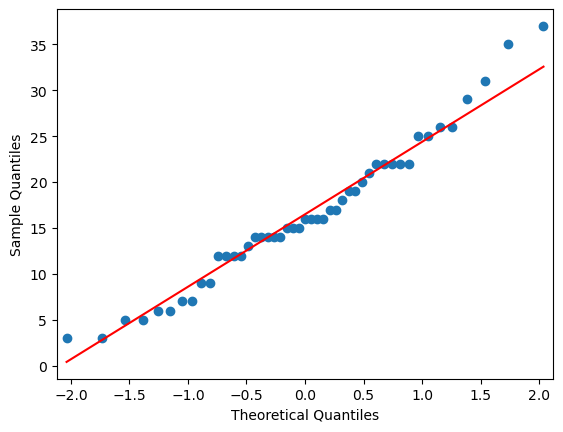

Education


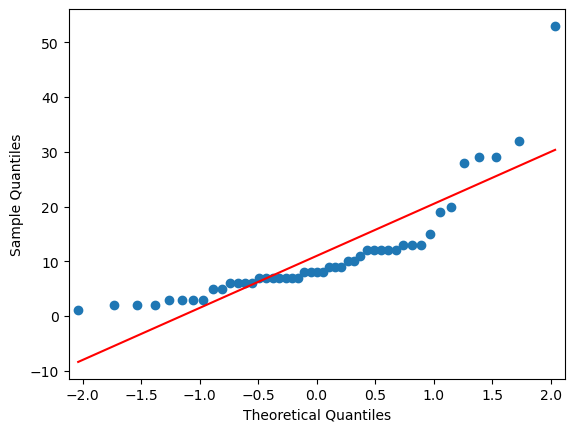

Catholic


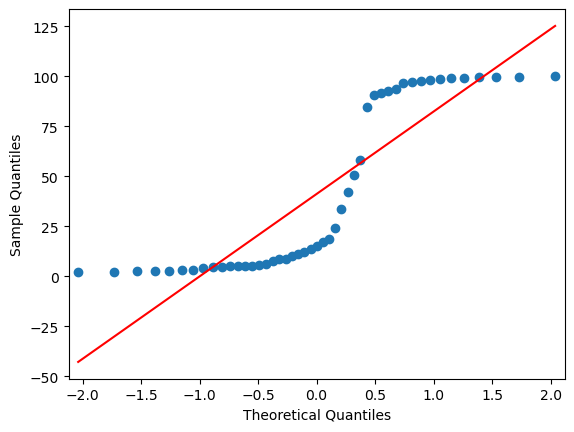

InfantMortality


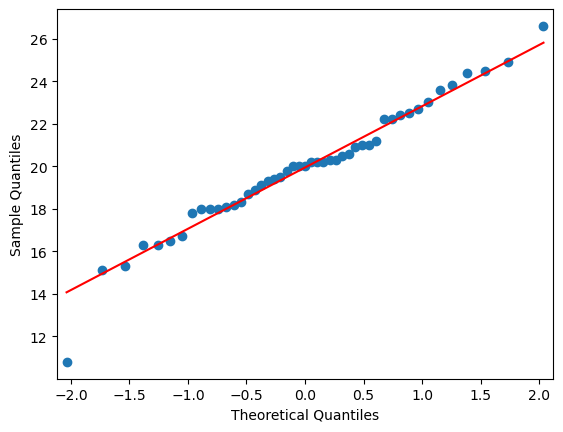

In [5]:
#Create QQ Plots

from statsmodels.graphics.gofplots import qqplot
import pylab

cnt = 1
for col in data2.columns:
    print(col)
    qqplot(data2[col],line='s')
    pylab.show()
    cnt += 1

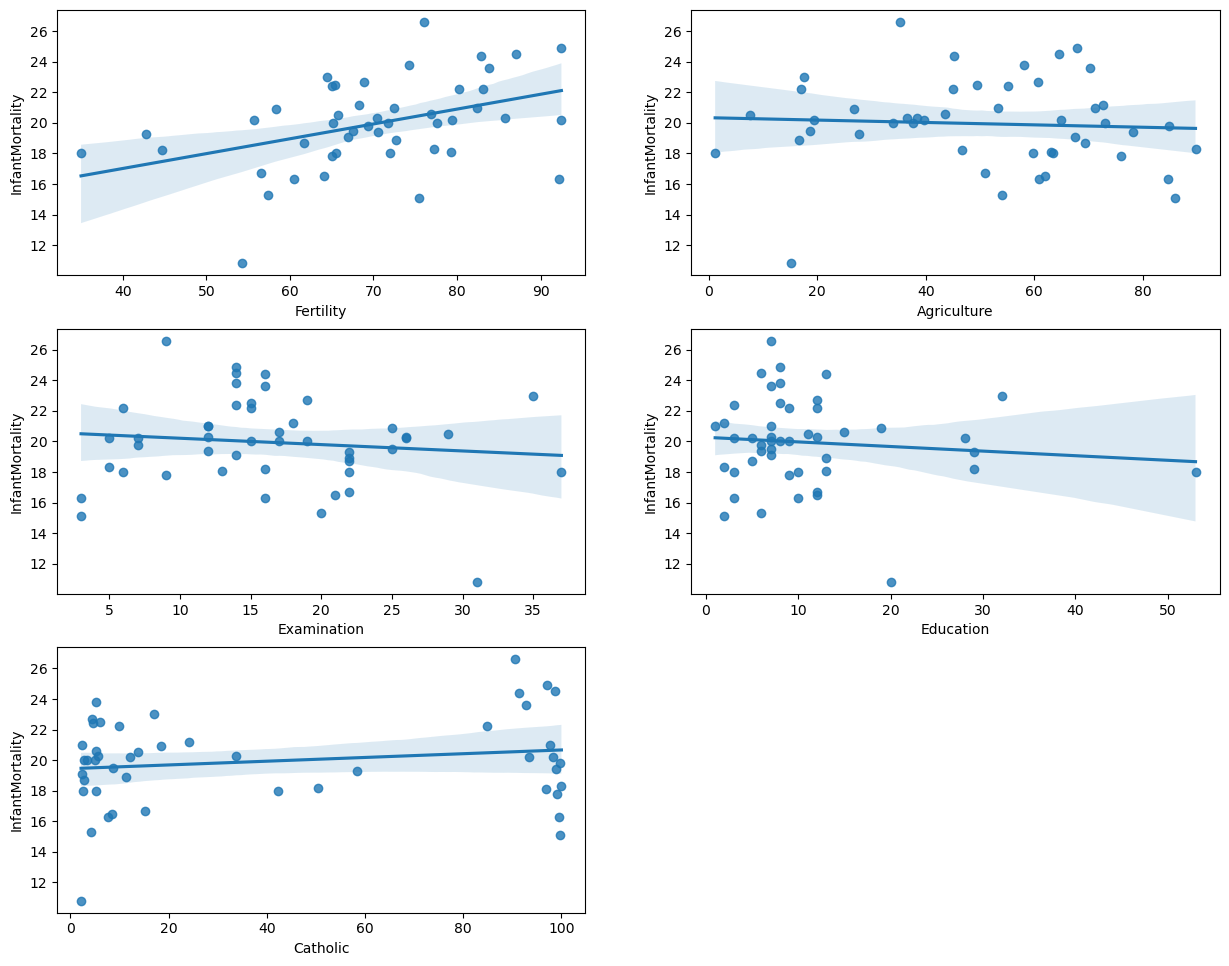

In [6]:
#Scatterplots - InfantMortality vs. Independent Variables

plt.figure(figsize = (15, 20))

cnt = 1
for col in data2.columns:
    if (col == 'InfantMortality'):
        continue
    
    plt.subplot(5, 2, cnt)
    lmgraph = sns.regplot(x = data[col], y = data.InfantMortality)
    lmgraph.set_xlabel(col)
    lmgraph.set_ylabel('InfantMortality')
    cnt += 1    

<Figure size 1500x2000 with 0 Axes>

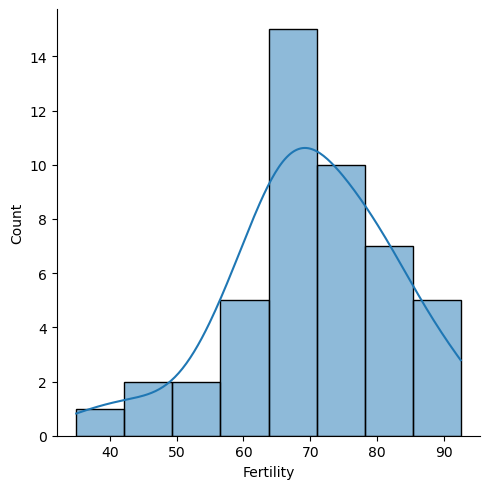

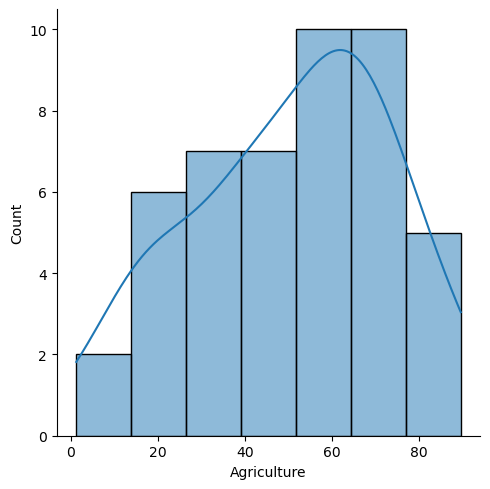

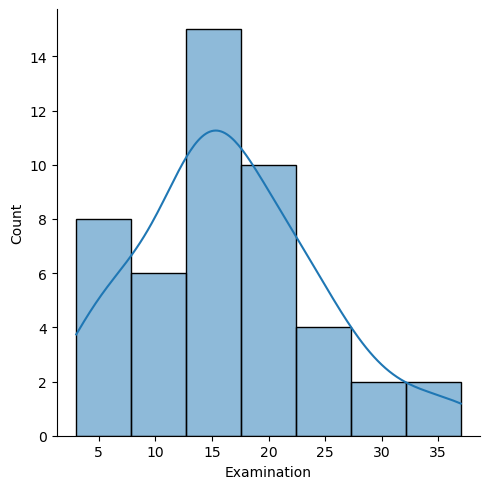

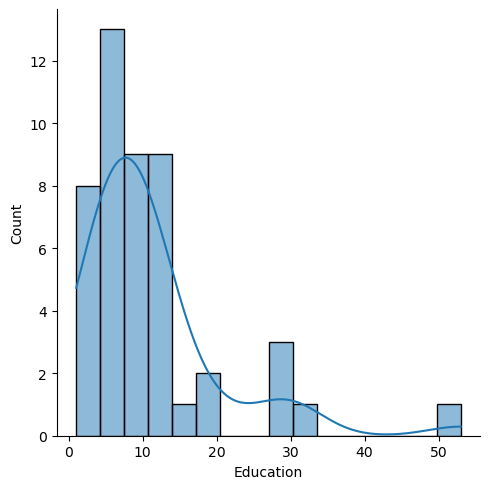

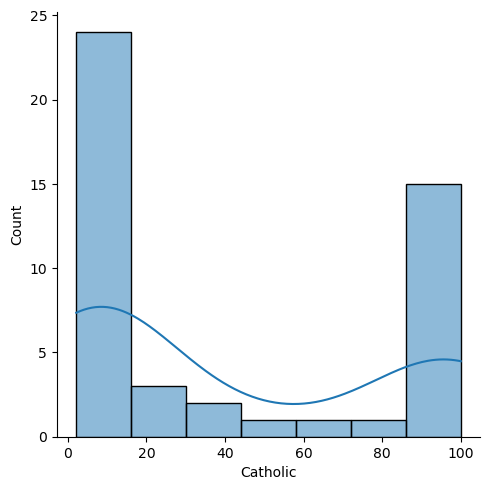

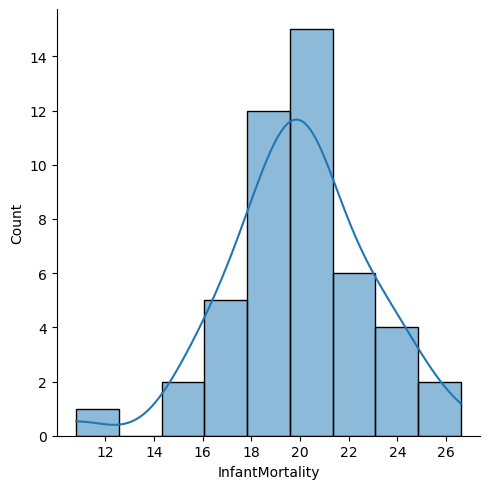

In [7]:
#Histogram with Distribution 

plt.figure(figsize = (15, 20))

cnt = 1
for col in data2.columns:
    lmgraphhist = sns.displot(x = data[col],kde=True)
    cnt += 1   

<Axes: >

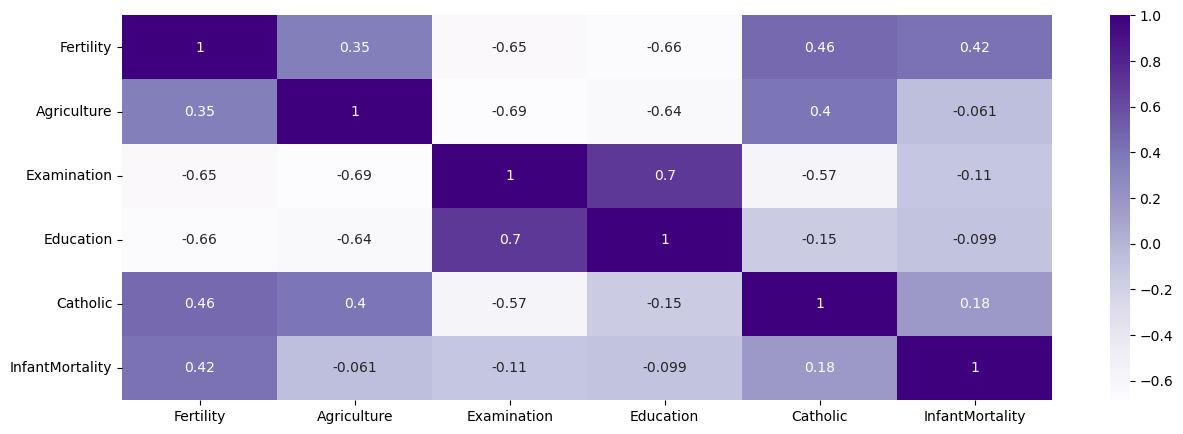

In [8]:
#Visualization of Correlations
fig = plt.figure(figsize=(15,5))
sns.heatmap(data2.corr(),annot=True,cmap="Purples")

In [ ]:
# Verify the column names again
print(data2.columns)

In [53]:
# Define x and y variable using the correct column name
x = data2.drop('InfantMortality', axis=1, errors='ignore').to_numpy()
y = data2['InfantMortality'].to_numpy()

# Create Train and Test Datasets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

# Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)

In [52]:
# Verify the shapes of x and y to ensure they are correct
print(f"x shape: {x.shape}")
print(f"y shape: {y.shape}")

x shape: (47, 5)
y shape: (47,)


In [55]:
#Script for Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn import metrics  

for name,method in [('Linear Regression', LinearRegression())]: 
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)

print('Method: {}'.format(name))   

#Coefficents
print('\nIntercept: {:0.2f}'.format(float(method.intercept_)))
coeff_table=pd.DataFrame(np.transpose(method.coef_),data2.drop('InfantMortality',axis=1).columns,columns=['Coefficients'])
print('\n')
print(coeff_table)
    
#MAE,MSE and RMSE
print('\nR2: {:0.2f}'.format(metrics.r2_score(y_test, predict)))
adjusted_r_squared2 = 1-(1-metrics.r2_score(y_test,predict))*(len(y)-1)/(len(y)-x.shape[1]-1)
print('Adj_R2: {:0.2f}'.format(adjusted_r_squared2))

print('\nMean Absolute Error: {:0.2f}'.format(metrics.mean_absolute_error(y_test, predict)))  
print('Mean Squared Error: {:0.2f}'.format(metrics.mean_squared_error(y_test, predict)))  
print('Root Mean Squared Error: {:0.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, predict)))) 

Method: Linear Regression

Intercept: 19.81


             Coefficients
Fertility        2.567064
Agriculture      0.500710
Examination      0.729700
Education        1.118652
Catholic        -0.636301

R2: -0.30
Adj_R2: -0.46

Mean Absolute Error: 2.49
Mean Squared Error: 10.54
Root Mean Squared Error: 3.25


In [56]:
#Forecast Table
predict2 = predict.T
diff = predict2-y_test
FcstTble=pd.DataFrame({'Actual':y_test,'Predicted':predict2.round(1),'Difference':diff.round(1)})
print('\nForecast Table')
FcstTble.head()


Forecast Table


,Actual,Predicted,Difference
0,23.6,21.6,-2.0
1,20.2,19.2,-1.0
2,18.0,19.8,1.8
3,19.5,19.2,-0.3
4,18.9,20.6,1.7
